# Laboratorio 1 - Procesamiento de una Señal de Audio

### Oscar Andrés Rojas Fonseca
### Sebastian Vega Cerdas
### Sharon Valverde Jiménez

## Importar Librerias

In [1]:
#!pip install numpy
#!pip install matplotlib

import numpy as np
import matplotlib.pyplot as plt
from scipy.io import wavfile
from scipy.fft import fft
from scipy.signal import hamming

C:\Users\Kley2\anaconda3\envs\myenv1\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\Kley2\anaconda3\envs\myenv1\lib\site-packages\numpy\.libs\libopenblas.FB5AE2TYXYH2IJRDKGDGQ3XBKLKTF43H.gfortran-win_amd64.dll
C:\Users\Kley2\anaconda3\envs\myenv1\lib\site-packages\numpy\.libs\libopenblas64__v0.3.21-gcc_10_3_0.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


## Análisis de la señal grabada a través del micrófono de un celular
El audio grabado llamado 'Celular.wav' se cargará con la libreria scipy a la variable "audio_data".

In [2]:
sample_rate_cel, audio_data_cel = wavfile.read('Celular.wav')

Seguidamente se aplica sobre esta señal de audio la transformada Fourier para así obtener el espectro de frecuencia

In [3]:
frequencies_cel = np.fft.fftfreq(len(audio_data_cel), d=1/sample_rate_cel)
magnitude_spectrum_cel = np.abs(fft(audio_data_cel))

Ahora se establece el rango de frecuencias y es limitado para el espectro deseado

In [4]:
positive_frequencies_cel = frequencies_cel[:len(frequencies_cel)//2]
positive_magnitude_cel = magnitude_spectrum_cel[:len(magnitude_spectrum_cel)//2]

Finalmente se establece los límites de la frecuencia para la gráfica y se procede a graficar el espectro de frecuencia de la señal de audio del celular

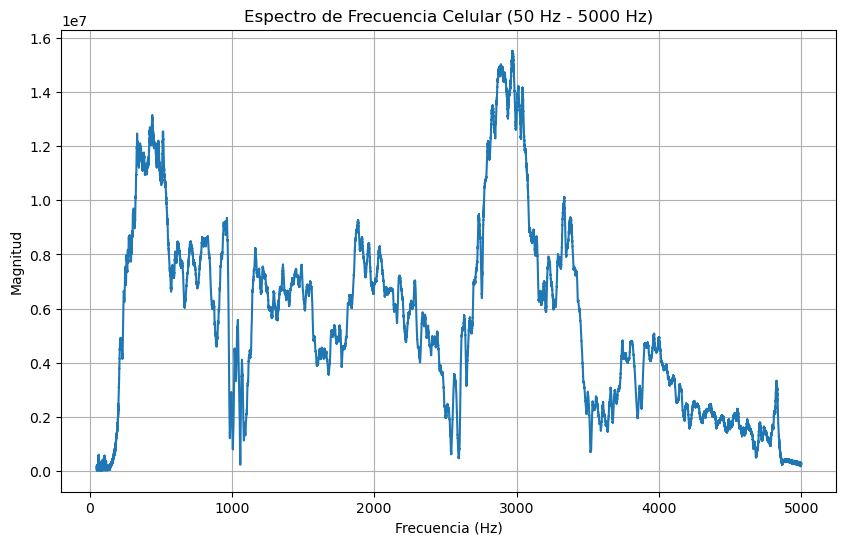

In [5]:
# Definir los límites de frecuencia para la gráfica
lower_limit = 50  # Hz
upper_limit = 5000  # Hz

# Encontrar los índices correspondientes a los límites de frecuencia
lower_index = np.argmax(positive_frequencies_cel >= lower_limit)
upper_index = np.argmax(positive_frequencies_cel >= upper_limit)

# Grafica el espectro de frecuencia limitado
plt.figure(figsize=(10, 6))
plt.plot(positive_frequencies_cel[lower_index:upper_index], positive_magnitude_cel[lower_index:upper_index])
plt.xlabel('Frecuencia (Hz)')
plt.ylabel('Magnitud')
plt.title('Espectro de Frecuencia Celular (50 Hz - 5000 Hz)')
plt.grid()
plt.show()

## Análisis de la señal grabada a través del micrófono de una laptop
El audio grabado llamado 'Computadora.wav' se cargará con la libreria scipy a la variable "audio_data".

In [6]:
# Carga el archivo de audio (reemplaza 'audio.wav' con tu nombre de archivo)
sample_rate_lap, audio_data_lap = wavfile.read('Laptop.wav')

# Realiza la transformada de Fourier para obtener el espectro de frecuencia
frequencies_lap = np.fft.fftfreq(len(audio_data_lap), d=1/sample_rate_lap)
magnitude_spectrum_lap = np.abs(fft(audio_data_lap))

# Limita el rango de frecuencias a la mitad positiva (no considera simetría)
positive_frequencies_lap = frequencies_lap[:len(frequencies_lap)//2]
positive_magnitude_lap = magnitude_spectrum_lap[:len(magnitude_spectrum_lap)//2]

Finalmente se establece los límites de la frecuencia para la gráfica y se procede a graficar el espectro de frecuencia de la señal de audio del celular

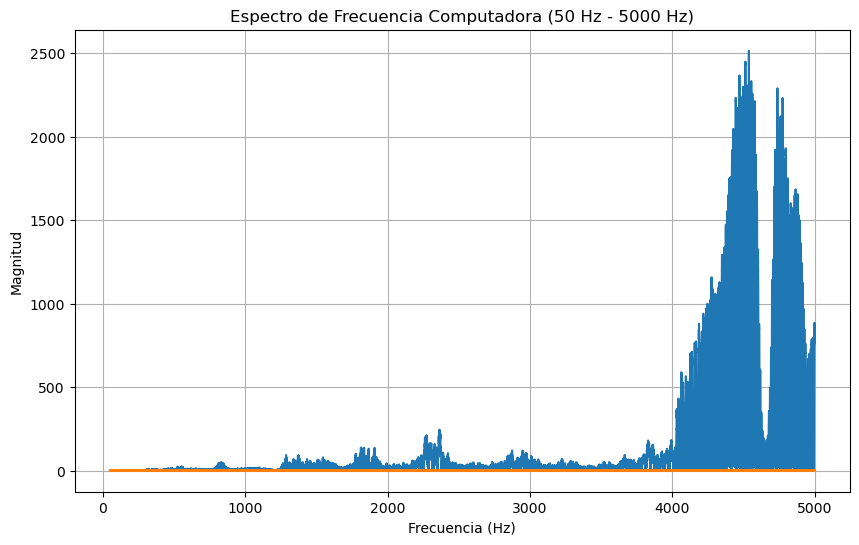

In [7]:
# Definir los límites de frecuencia para la gráfica
lower_limit = 50  # Hz
upper_limit = 5000  # Hz

# Encontrar los índices correspondientes a los límites de frecuencia
lower_index = np.argmax(positive_frequencies_lap >= lower_limit)
upper_index = np.argmax(positive_frequencies_lap >= upper_limit)

# Grafica el espectro de frecuencia limitado
plt.figure(figsize=(10, 6))
plt.plot(positive_frequencies_lap[lower_index:upper_index], positive_magnitude_lap[lower_index:upper_index])
plt.xlabel('Frecuencia (Hz)')
plt.ylabel('Magnitud')
plt.title('Espectro de Frecuencia Computadora (50 Hz - 5000 Hz)')
plt.grid()
plt.show()

## Ventana de Hamming  (en proceso)

### Celular

aa
aa
aa
aa
aa


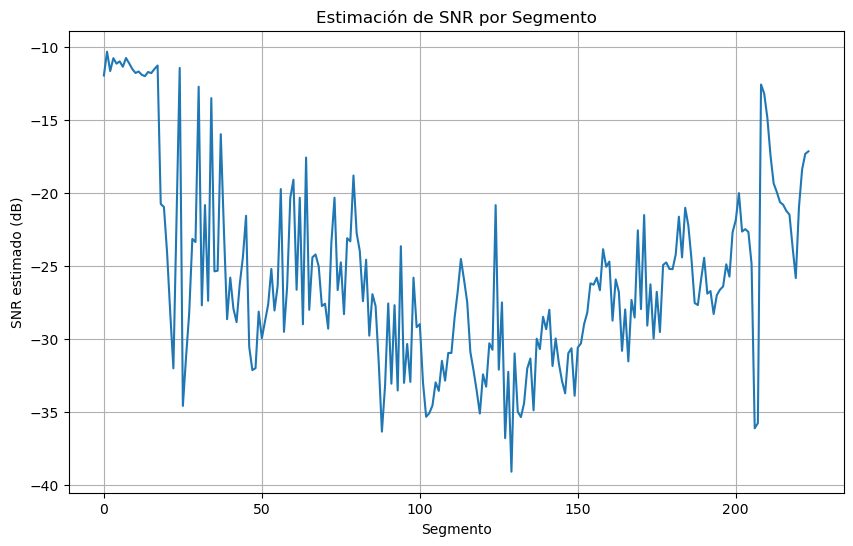

SNR promedio: -25.63 dB
SNR máximo: -10.35 dB
SNR mínimo: -39.09 dB


In [8]:
sample_rate_celruido, reference_tone = wavfile.read('1kHz_Celular.wav')

# Calcular la potencia del tono de referencia
reference_power = np.sum(reference_tone ** 2) / len(reference_tone)

# Definir parámetros para el análisis de segmentos
segment_length = int(sample_rate_cel * 0.1)  # 100 ms aproximadamente
overlap = int(segment_length * 0.5)  # 50% de superposición

# Calcular la ventana de Hamming
hamming_window = hamming(segment_length)

# Inicializar listas para almacenar las estimaciones de SNR de cada segmento
snr_estimates = []

# Procesar la señal en segmentos
for start in range(0, len(audio_data_cel) - segment_length + 1, segment_length - overlap):

    if start<=4*(segment_length - overlap):
        print("aa")

    else:
        segment = audio_data_cel[start:start + segment_length].astype(np.float64)
        segment *= hamming_window  # Aplicar la ventana de Hamming al segmento
    
        # Calcular la FFT del segmento
        segment_fft = fft(segment)
        positive_frequencies = np.fft.fftfreq(len(segment), d=1/sample_rate_cel)[:len(segment)//2]
        magnitude_spectrum = np.abs(segment_fft)[:len(segment)//2]
    
        # Calcular la potencia total en la banda de interés
        signal_power = np.sum(magnitude_spectrum[lower_index:upper_index] ** 2) / len(magnitude_spectrum[lower_index:upper_index])
    
        # Calcular la potencia del ruido (resta de potencias)
        noise_power = signal_power - reference_power
    
        #print("Signal Power:", signal_power)
        #print("Noise Power:", noise_power)
    
        # Calcular el SNR en decibelios (dB)
        snr_db = 10 * np.log10(abs(reference_power / noise_power))
        
        snr_estimates.append(snr_db)

# Graficar los valores estimados de SNR por segmento
plt.figure(figsize=(10, 6))
plt.plot(snr_estimates)
plt.xlabel('Segmento')
plt.ylabel('SNR estimado (dB)')
plt.title('Estimación de SNR por Segmento')
plt.grid()
plt.show()

# Mostrar el SNR promedio y máximo de todos los segmentos

average_snr = np.mean(snr_estimates)
max_snr = np.max(snr_estimates)
min_snr = np.min(snr_estimates)
print("SNR promedio: {:.2f} dB".format(average_snr))
print("SNR máximo: {:.2f} dB".format(max_snr))
print("SNR mínimo: {:.2f} dB".format(min_snr))


### Computadora

aa
aa


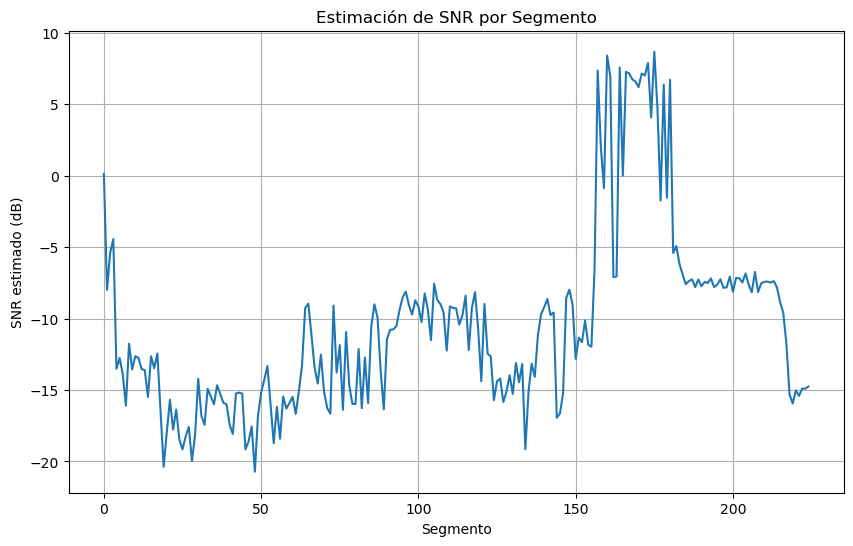

SNR promedio: -10.46 dB
SNR máximo: 8.68 dB
SNR mínimo: -20.72 dB


In [9]:
audio_data_lap = audio_data_lap[:, 0] # Dejando solo el canal izquierdo para evitar problemas

# Generar el tono de referencia de 1 kHz
#t = np.arange(len(audio_data_lap)) / sample_rate_lap

sample_rate_lapruido, reference_tone = wavfile.read('1kHz_Laptop.wav')

reference_tone = reference_tone[:, 0]

# Definir parámetros para el análisis de segmentos
segment_length = int(sample_rate_lap * 0.1)  # 100 ms aproximadamente
overlap = int(segment_length * 0.5)  # 50% de superposición

# Calcular la ventana de Hamming
hamming_window = hamming(segment_length)

# Inicializar listas para almacenar las estimaciones de SNR de cada segmento
snr_estimates = []

# Procesar la señal en segmentos
for start in range(0, len(audio_data_lap) - segment_length + 1, segment_length - overlap):

    if start<=1*(segment_length - overlap):
        print("aa")

    else:
        segment = audio_data_lap[start:start + segment_length].astype(np.float64)
        segment *= hamming_window  # Aplicar la ventana de Hamming al segmento
    
        # Calcular la FFT del segmento
        segment_fft = fft(segment)
        positive_frequencies = np.fft.fftfreq(len(segment), d=1/sample_rate_lap)[:len(segment)//2]
        magnitude_spectrum = np.abs(segment_fft)[:len(segment)//2]
    
        # Calcular la potencia total en la banda de interés
        signal_power = np.sum(magnitude_spectrum[lower_index:upper_index] ** 2) / len(magnitude_spectrum[lower_index:upper_index])
    
        # Calcular la potencia del ruido (resta de potencias)
        noise_power = signal_power - reference_power
    
        # Calcular el SNR en decibelios (dB)
        snr_db = 10 * np.log10(abs(reference_power / noise_power))
        
        snr_estimates.append(snr_db)
    
        #print("Signal Power:", signal_power)
        #print("Noise Power:", noise_power)

# Graficar los valores estimados de SNR por segmento
plt.figure(figsize=(10, 6))
plt.plot(snr_estimates)
plt.xlabel('Segmento')
plt.ylabel('SNR estimado (dB)')
plt.title('Estimación de SNR por Segmento')
plt.grid()
plt.show()

# Mostrar el SNR promedio y máximo de todos los segmentos
average_snr = np.mean(snr_estimates)
max_snr = np.max(snr_estimates)
min_snr = np.min(snr_estimates)
print("SNR promedio: {:.2f} dB".format(average_snr))
print("SNR máximo: {:.2f} dB".format(max_snr))
print("SNR mínimo: {:.2f} dB".format(min_snr))

## Referencias

- https://realpython.com/python-scipy-fft/
- https://www.bogotobogo.com/python/OpenCV_Python/python_opencv3_Signal_Processing_with_NumPy_Fourier_Transform_FFT_DFT.php
-
-
-